# import library

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Visualize data

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/tmp/ipykernel_30/4075148193.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


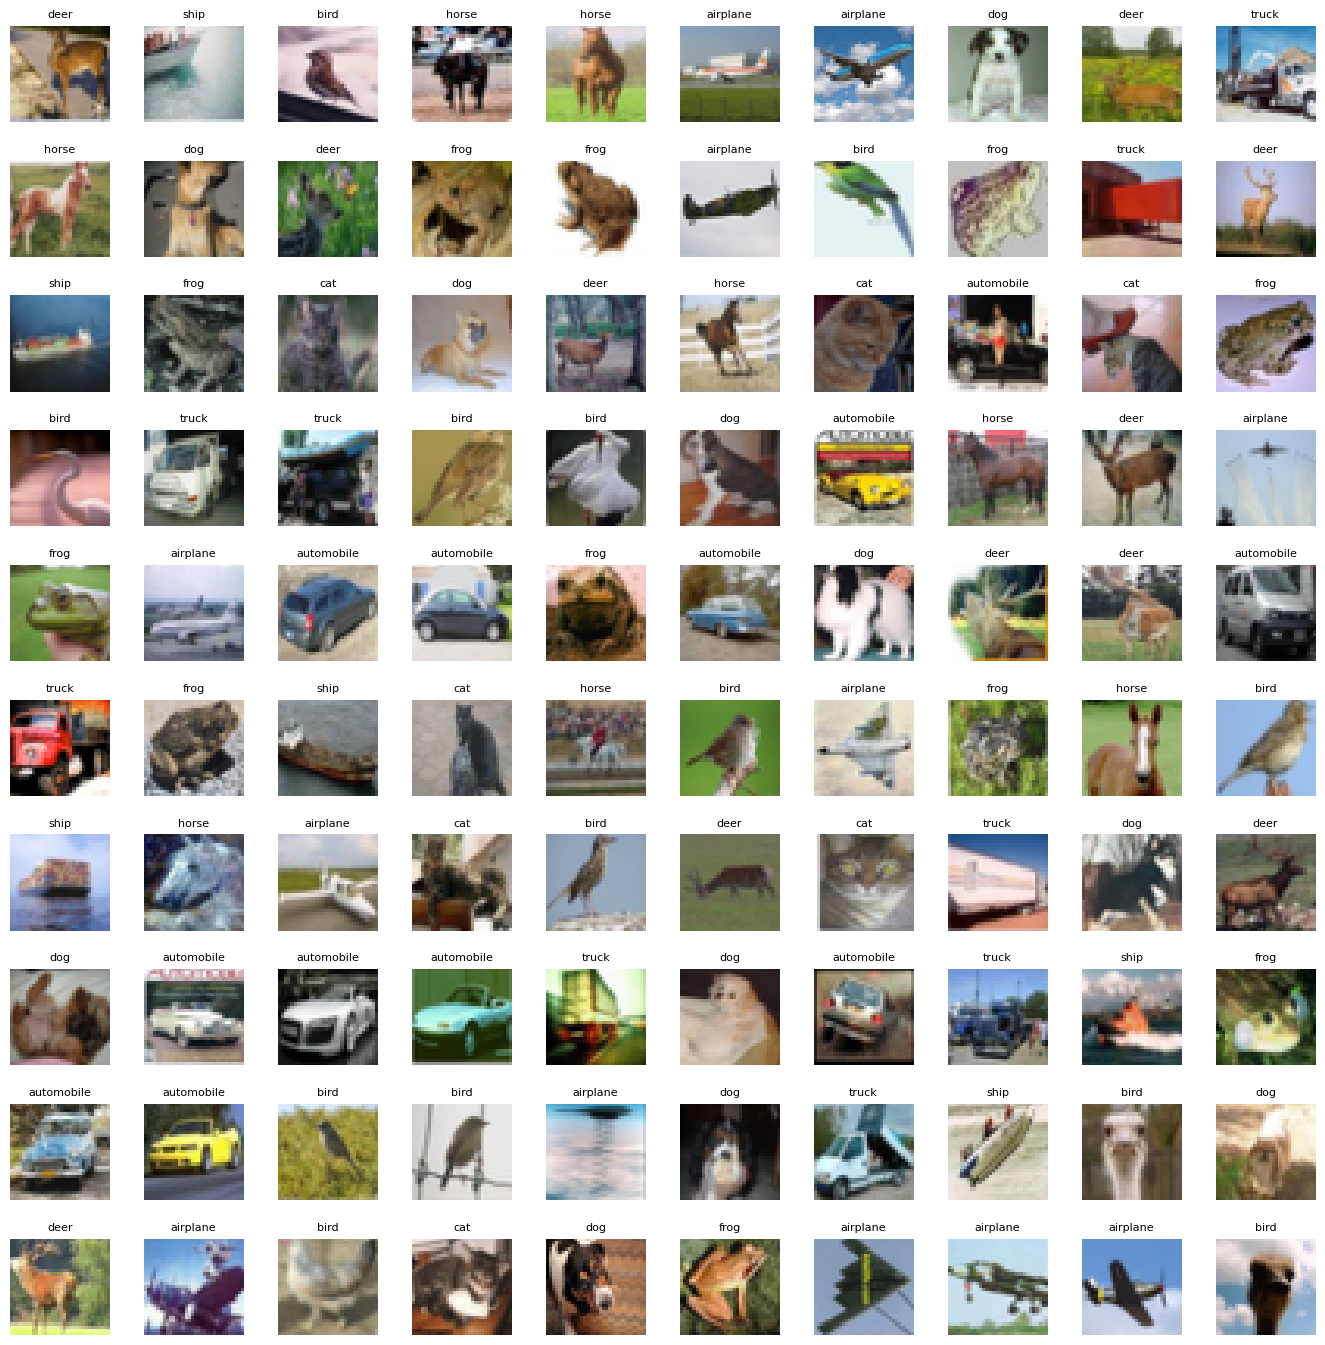

In [ ]:
W_grid = 10
L_grid = 10


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(x_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Training Class distribution')

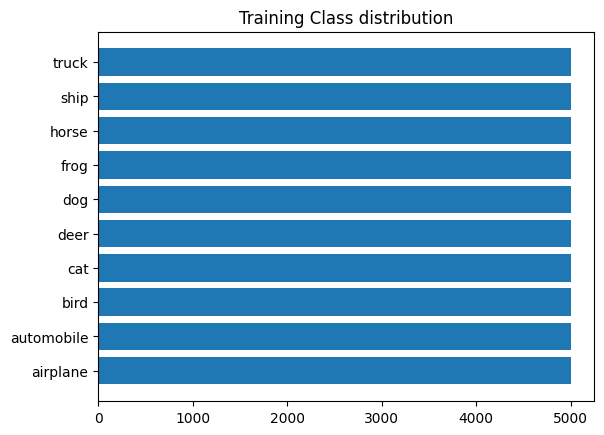

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Training Class distribution')

Text(0.5, 1.0, 'Test Class distribution')

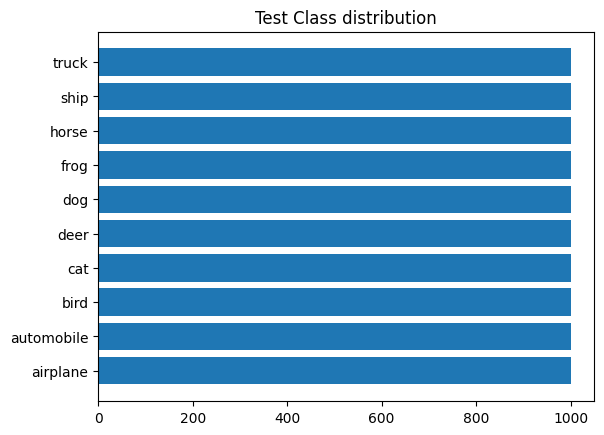

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(labels, counts)
plt.title('Test Class distribution')

# Normalize the data
we scale the image data and flatten the y data, and turn the y data/classes into categorical.

In [ ]:
# Scale the data
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)

# Defining model
Using the alexnet model architecture, we rebuild the model by changing the input shape into (32,32,3) and the output shape as 10 based on the number of the classes.

In [ ]:
num_classes = 10

model = tf.keras.models.Sequential()

model.add(keras.layers.Conv2D(96, kernel_size=(5, 5), strides=2,padding='same', activation='relu',input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(keras.layers.Conv2D(256, kernel_size=(5, 5), strides=1,padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(keras.layers.Conv2D(384, kernel_size=(3, 3), strides=1,padding='same', activation='relu'))
model.add(keras.layers.Conv2D(384, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), strides=1,padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(1000, activation='relu'))

model.add(keras.layers.Dense(num_classes, activation='softmax'))


model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 96)     │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,660,546 (97.89 MB)

 Trainable params: 25,660,546 (97.89 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model
We trained the model using Adam as the optimizer with a batch size of 120 and trained the model within 8 epochs.


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, batch_size= 120, validation_data=(x_test, y_test_encoded),epochs= 8)

Epoch 1/8


I0000 00:00:1727872960.080684     103 service.cc:145] XLA service 0x7fc708013260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727872960.080752     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727872960.080758     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 10/417 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1146 - loss: 2.3822

I0000 00:00:1727872966.270680     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


417/417 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.1819 - loss: 2.0549 - val_accuracy: 0.3572 - val_loss: 1.7828
Epoch 2/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4095 - loss: 1.5357 - val_accuracy: 0.4747 - val_loss: 1.3765
Epoch 3/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5337 - loss: 1.2644 - val_accuracy: 0.5586 - val_loss: 1.2236
Epoch 4/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6038 - loss: 1.0973 - val_accuracy: 0.6101 - val_loss: 1.1021
Epoch 5/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6501 - loss: 0.9894 - val_accuracy: 0.6382 - val_loss: 1.0455
Epoch 6/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6864 - loss: 0.8844 - val_accuracy: 0.6594 - val_loss: 1.0215
Epoch 7/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7184 - loss: 0.7991 - val_accuracy: 0.6716 - val_loss: 1.0024
Epoch 8/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7472 - loss: 0.7258 - val_accuracy: 0.6686 - va

# Evaluate the model

In [ ]:
score = model.evaluate(x_test, y_test_encoded)
print(f'test loss : {score[0]}')
print(f'test accuracy : {score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6672 - loss: 0.9735
test loss : 0.9733400344848633
test accuracy : 0.6686999797821045


# Plot the accuracy and loss


*   The training accuracy of the model is 74.72% while the validation accuracy is 66.72%.
*  The training loss 0.7528 and the validation loss is 0.9735.



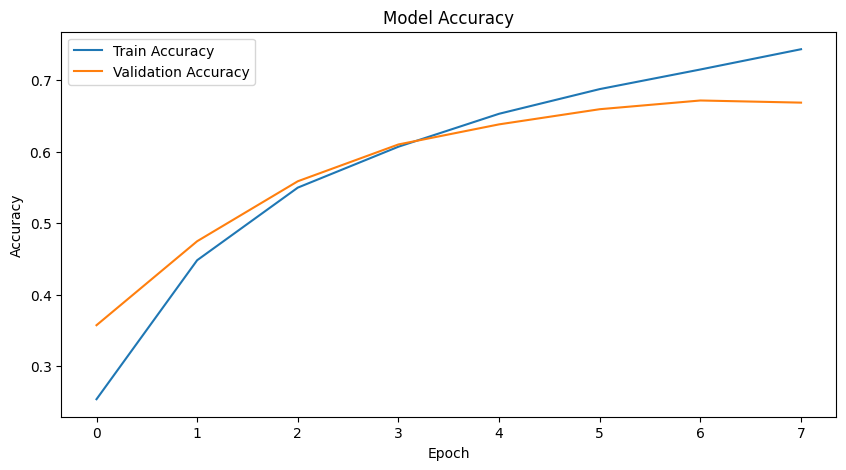

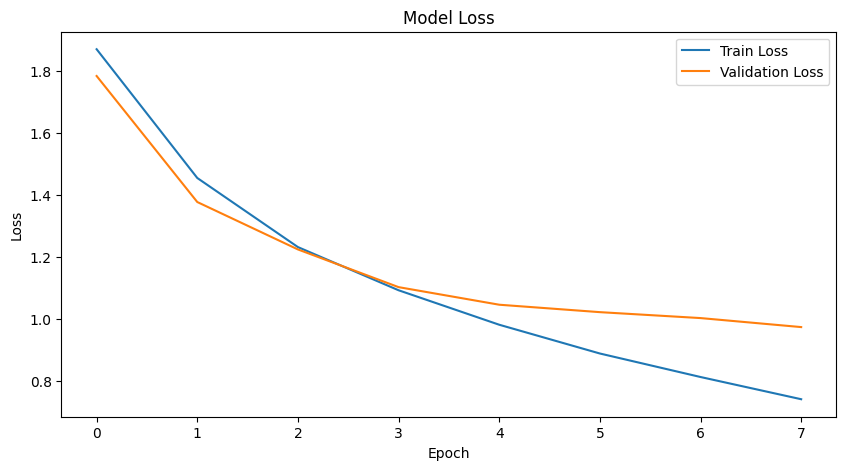

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()